**Prediction of Obesity Risk by Umut CİNDİLOĞLU**
* **Turkish Explained EDA I Pre-Pro I RFC ML MODEL %89 Acc**

Bu çalışamada, Kaggle'da bulunan "Prediction of Obesity Risk" yarışmasına ait veri seti kullanılmıştır. Bu yarışmada amaç, kişinin obezite riskini, çeşitli bilgilere göre hesaplamaktır.

In [1]:
#veri manipülasyonu ve matematiksel işlemler için gerekli kütüphaneleri yüklüyoruz
import numpy as np
import pandas as pd

In [3]:
#Bu yarışmada test ve train veri setleri hazır olarak verilmiştir. 
given_train_data=pd.read_csv("train.csv")
given_test_data=pd.read_csv("test.csv")

In [4]:
given_train_data.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
given_test_data.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [6]:
print(given_train_data.shape)
print(given_test_data.shape)

(20758, 18)
(13840, 17)


Görüldüğü üzere train veri setinde 20758 veri ve 18 sütun, test veri setinde ise 13840 veri ve 17 sütun vardır. 
Test veri setinde bir tane sütunun az olmasının sebebi, train veri setinde eğitim işlemini gerçekleştirebilmek için hedef değerler (label) varken, test veri setinde verilmemiştir.


In [7]:
given_train_data.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

### Öncelikle ilgili sütunların neyi ifade ettiğini açıklayalım;

* **id**:Kişinin uniq id numarası
* **Gender**:Cinsiyet* **Age**:Yaş
* **
Heigh**t B.y* **
Weig**h: 5.l* **o
family_history_with_overwei**ght: Ailede obezite k6.ü* **sü
**FAVC: Yüksek kalorili gıdaların sık ke7.t* **imi**
FCVC: Sebze tüketca sı8.k* **lığ**ı
NCP: Anağün 9.s* **ayıs**ı
CAEC: Öğünler arası yiek t10.ü* **ketim**i
SMOKE:tün k11.u* **llan**ımı
CH20: Günlük su12. * **tük**etimi
SCC: Kalori tüketiminin13. * **izl**enmesi
FAF: Fizel aktiv14.i* **te **sıklığı
TUE: Teknolojik czları kul15.l* **anma** süi
CALC: A16il* **kol tü**ketimi
MTanANS: Kullanıln ulaşım şekli


**NObeyesdad** ise, kişinin obezite durumunu bize verir.
Burada farklı farklı obezite durumları vardır, bunları inceleyecek olursak;


In [12]:
print(given_train_data["NObeyesdad"].unique())

class_counts = given_train_data["NObeyesdad"].value_counts()
class_counts

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

Görüldüğü üzere hedef sütunumuzda 7 farklı sınıf vardır. Bu sınıfların ne ifade ettiğini açıklayacak olursak;

* **Obesity_Type_III**: Tip III obezite, aşırı obezite olarak da bilinir ve Vücut Kitle İndeksi (VKİ) 40 veya üzeri olan kişileri ifade eder. Bu durum,   ciddi sağlık riskleri taşır.
* **Obesity_Type_II**: Tip II obezite, VKİ'nin 35-39.9 arasında olduğu durumu ifade eder ve yüksek sağlık riskleri taşır.
* **Normal_Weight**: Normal ağırlık, VKİ'nin 18.5 ile 24.9 arasında olduğu sağlıklı vücut ağırlığını ifade eder.
* **Obesity_Type_I**: Tip I obezite, VKİ'nin 30-34.9 arasında olduğu durumu ifade eder ve orta düzeyde sağlık riskleri ile ilişkilendirilir.
* **Insufficient_Weight**: Yetersiz ağırlık, VKİ'nin 18.5'in altında olduğu durumu ifade eder ve bu da çeşitli sağlık problemlerine yol açabilir.
* **Overweight_Level_II**: Aşırı kilo seviyesi II, VKİ'nin 30'a yaklaşan ancak henüz obezite olarak sınıflandırılmayan durumu ifade eder. Genellikle VKİ 28-29.9 arasında olan kişiler bu kategoriye girer.
* **Overweight_Level_I**: Aşırı kilo seviyesi I, VKİ'nin 25-27.9 arasında olduğu durumu ifade eder ve hafif sağlık riskleri taşır.kleri taşır.

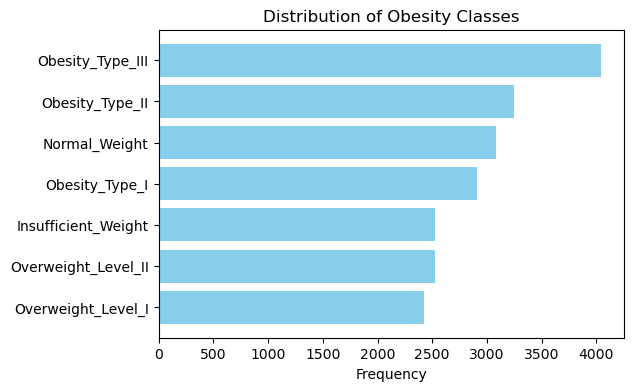

In [14]:
#Sınıf dağılımlarını görselleştirelim
import matplotlib.pyplot as plt
# Görselleştirme
plt.figure(figsize=(6, 4))
plt.barh(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('Frequency')
plt.title('Distribution of Obesity Classes')
plt.gca().invert_yaxis()  # En yüksek frekanslı sınıfı üstte göstermek için y eksenini ters çevirme
plt.show()

In [15]:
#veri setinde eksik değerler olup olmadığını kontrol edelim
given_train_data.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Veri setinde eksik verilen değerler bulunmuyor

In [16]:
#Veri seti ile alakalı sütun bilgilerini kontrol edelim
given_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

**Görüldüğü üzere veri setimizde kategorik ve sürekli olmak üzere iki tip veri type'ı mevcut. Bu veriler üzerinde daha kolay işlemler yapabilmek için iki değişkene bunları ayıralım.**

In [18]:
categorical_features = given_train_data.select_dtypes(include=['object']).columns
continuous_features = given_train_data.select_dtypes(include=['float64', 'int64']).columns

# Kategorik ve sürekli verileri ayrı DataFrame'lere aktarma
data_cat = given_train_data[categorical_features]
data_cont = given_train_data[continuous_features]
print(data_cat.columns)
print(data_cont.columns)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


#**id** sütunu işimize yaramayacağı için, yeni bir değişkende bu sütunu saklayabiliriz. Ancak yarışmada id sütunu ile yanıtları yükleyeceğimiz için bu sütunu kaybetmemekte fayda vardır.

In [ ]:
data_id = data_cont['id']
data_cont.drop('id', axis=1, inplace=True)

Kategorik değişkenleri daha iyi anlayabilmek için, Her bir kategorik değişken için frekans görselleştirmesi yapabiliriz

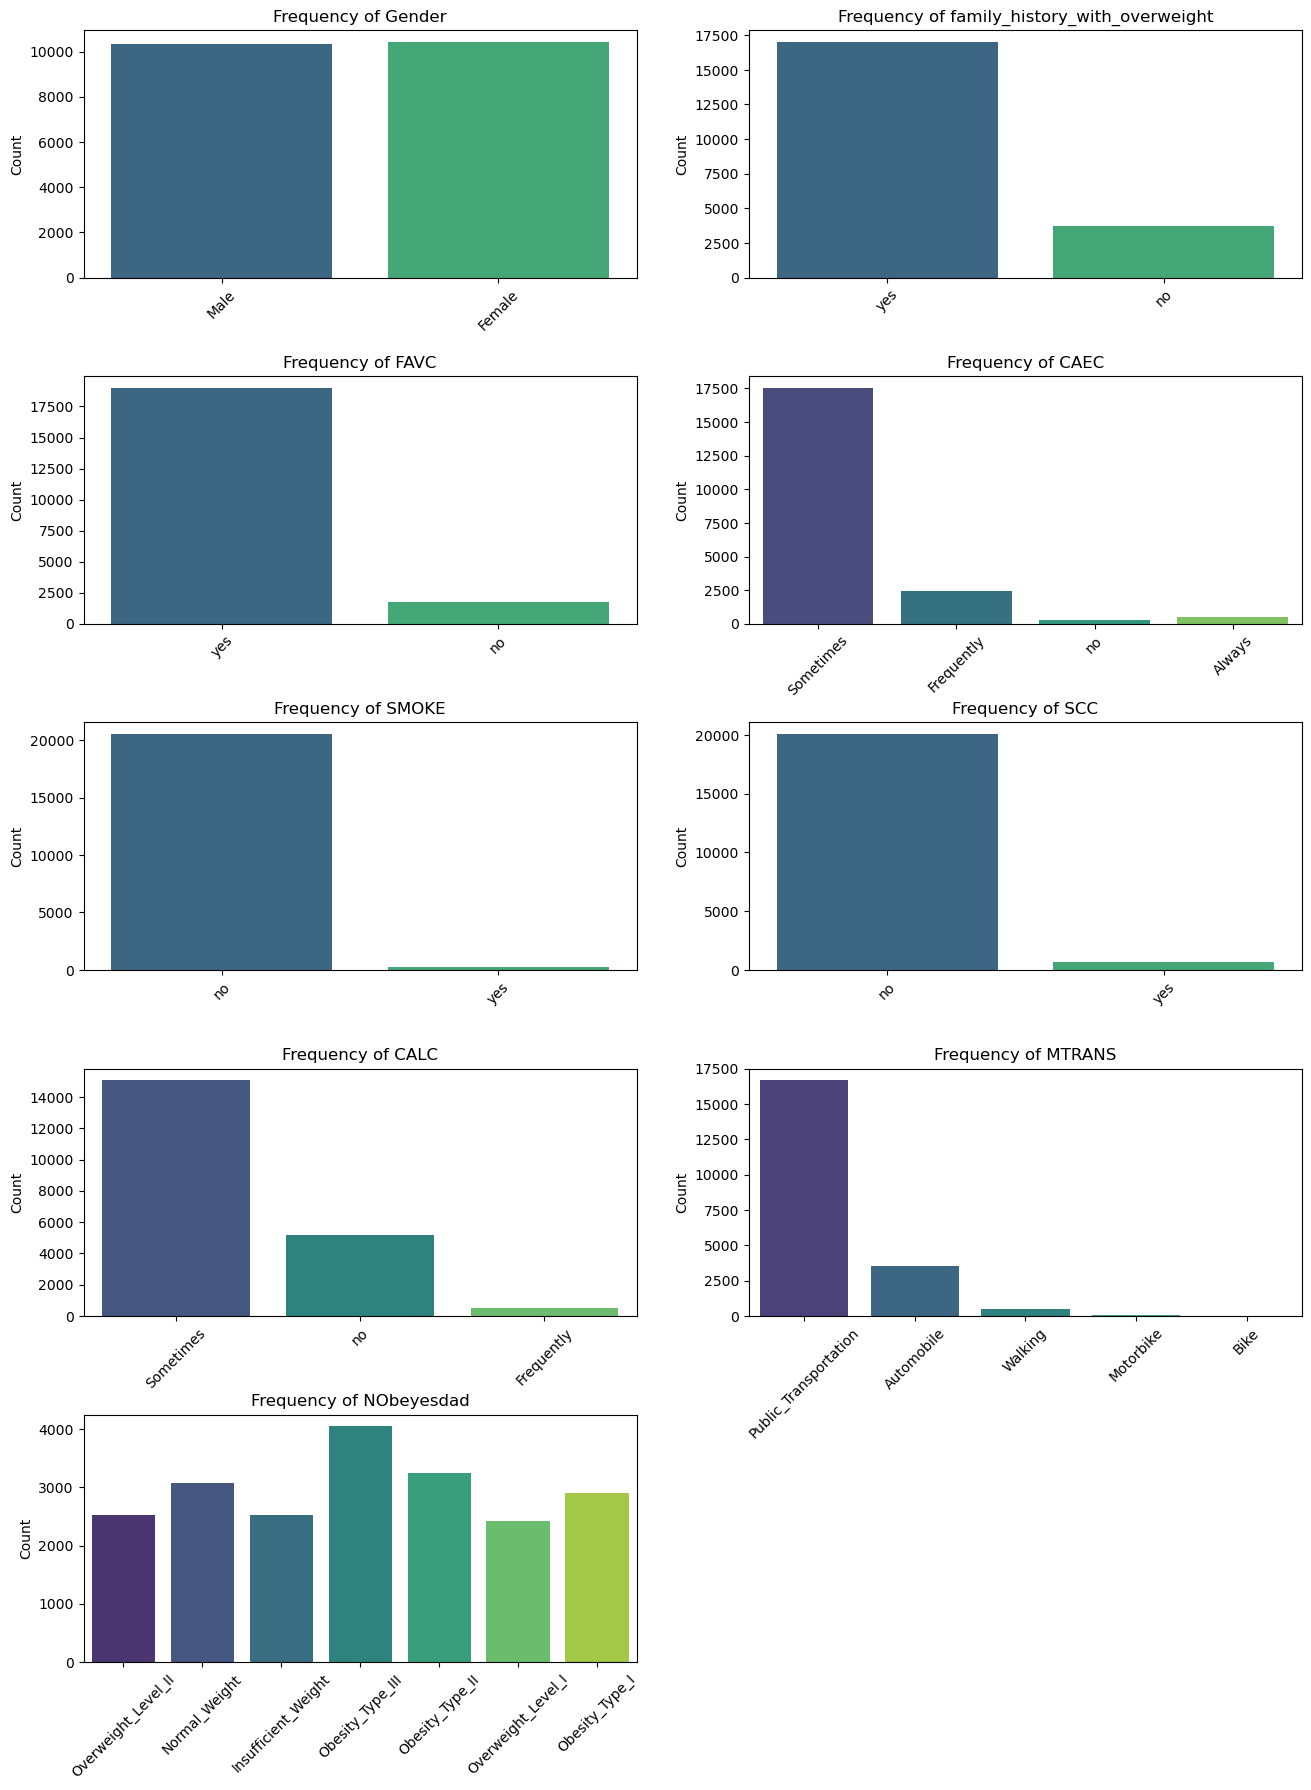

In [42]:
import seaborn as sns

# Her bir kategorik değişken için frekans grafiği çizdirme
fig, axes = plt.subplots(nrows=(len(data_cat.columns)+1) // 2, ncols=2, figsize=(14, len(data_cat.columns) * 2))
fig.tight_layout(pad=5.0)

# Eksenler düzgün şekilde yerleştirilmesi için ayarlama
axes = axes.ravel()

for i, col in enumerate(data_cat.columns):
    sns.countplot(x=data_cat[col], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Fazladan oluşturulan eksenleri kapatma
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

Aynı şekilde, sürekli olan değerler için de görselleştirme yapaibiliriz.

In [40]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
#Kodları çalıştırırken gelen uyarıları kapatmak için bu kodları kullanabiliriz

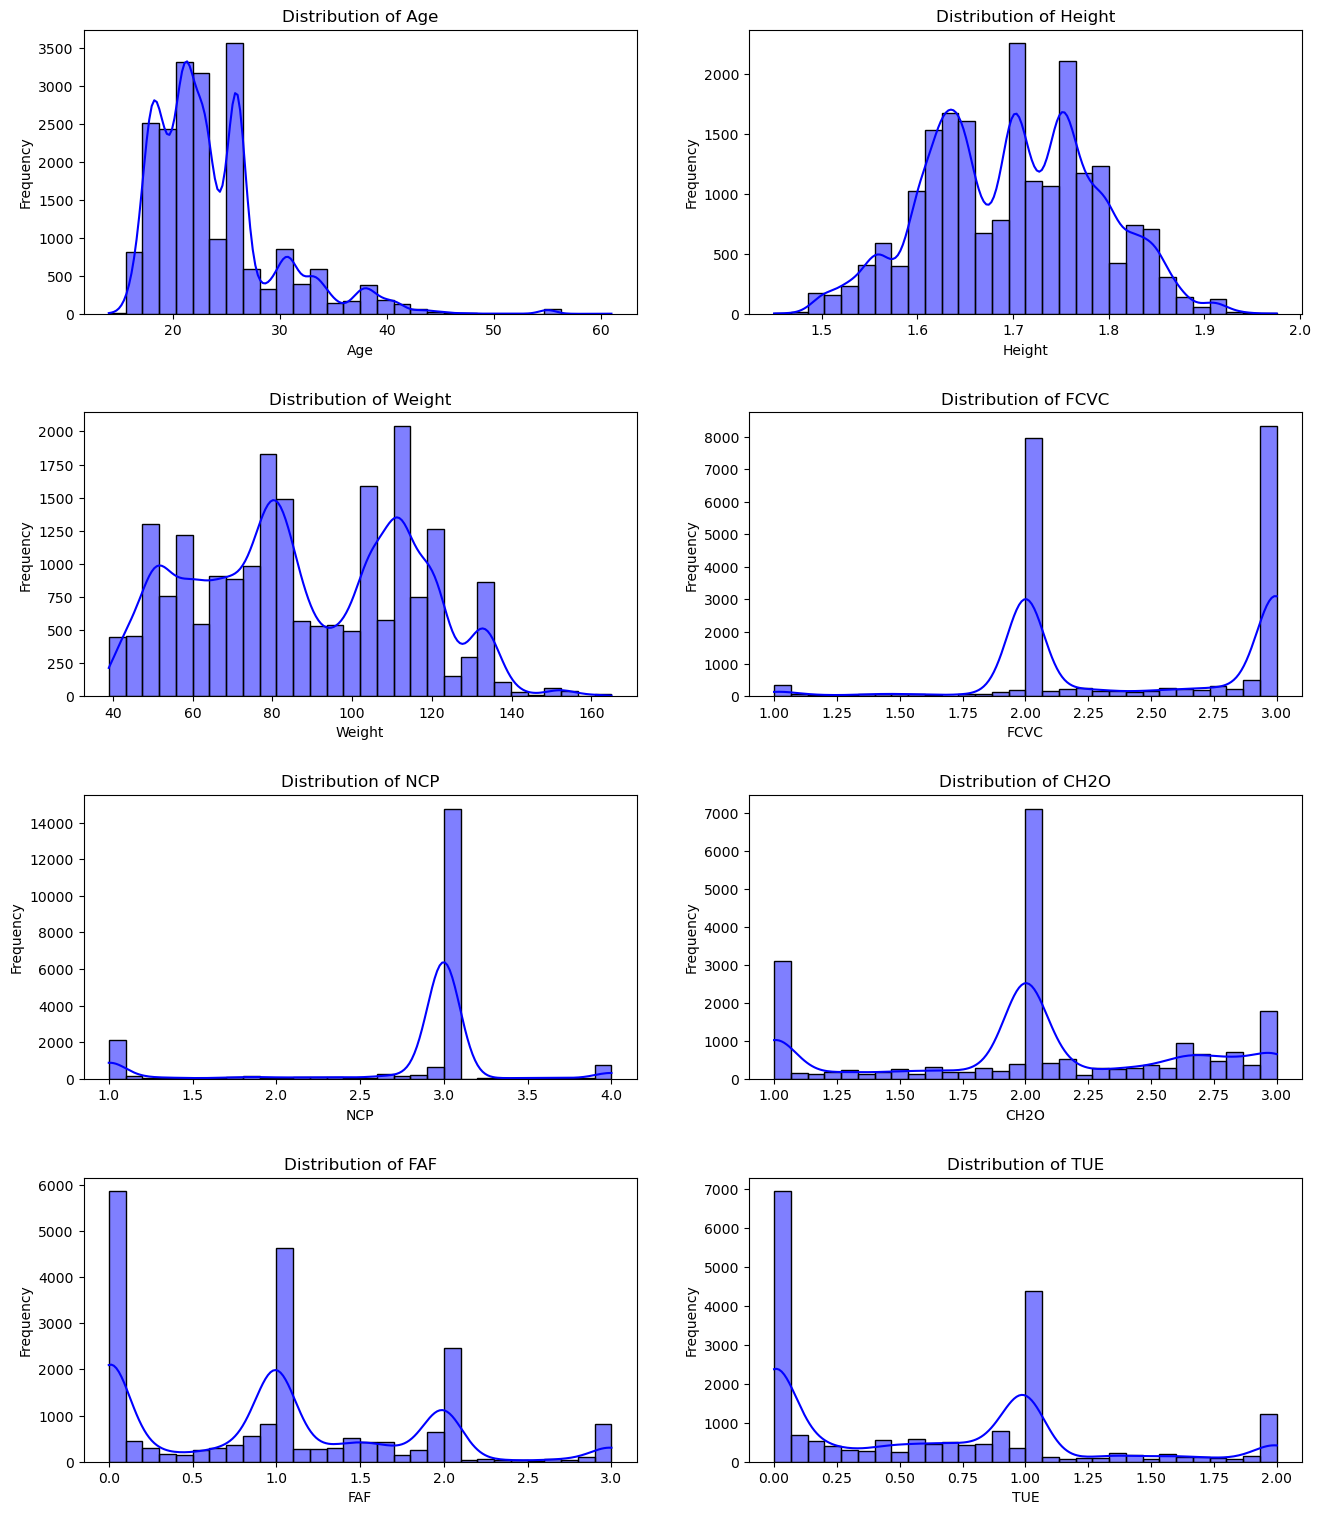

In [41]:
# Sürekli değişkenler için histogram çizdirme
fig, axes = plt.subplots(nrows=(len(data_cont.columns) + 1) // 2, ncols=2, figsize=(14, len(data_cont.columns) * 2))
fig.tight_layout(pad=5.0)

# Eksenler düzgün şekilde yerleştirilmesi için ayarlama
axes = axes.ravel()

for i, col in enumerate(data_cont.columns):
    sns.histplot(data_cont[col], ax=axes[i], kde=True, color='blue', bins=30)  # KDE eklendiği için daha yumuşak bir eğri elde edilir
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Fazladan oluşturulan eksenleri kapatma
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

In [44]:
#sürekli veriler için tanımlayıcı istatistiklere göz atalım
data_cont.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [45]:
#kategorik veriler için tanımlayıcı istatistiklere göz atalım
data_cat.describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


Sürekli veriler arasında korelasyon tablosu oluşturup, verilerin birbirleri arasında korelasyona bakabiliriz. Korelasyon analizi için daha detaylı bilgiye buradan ulaşabilirsiniz: https://umutcindiloglu.com/3-korelasyon-analizi/

In [54]:
# Korelasyon matrisini hesaplama
correlation_matrix = data_cont.corr()
correlation_matrix

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154
Height,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433
Weight,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471
FCVC,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843
NCP,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459
CH2O,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654
FAF,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213
TUE,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000


Görüldüğü üzere, herhangi bir değişken ikilisinde yüksek korelasyon gözükmüyor. Bu durumda geliştireceğimiz modele girdi olarak tüm sütunları seçebiliriz. Ancak öncesinde bu sütunlarda herhangi bir aykırı değer var mı kontrol edelim. Bunun için box plot kullanabiliriz.

* **Not:** Korelasyon analizi yapmadan önce değişkenlerin normal dağılım gösterip göstermediğini kontrol etmek, ve bu sonuçlara göre detaylı korelasyon analizi yapmak daha sağlıklıdır. Ancak örnek olması açısından şuan öncesinde herhangi bir istatistiksel analiz yapmadan Pearson Korelasyon gerçekleştirdik.
* **Korelasyon analizi** öncesinde değişkenlerin dağılımlarını incelemek iyi bir yaklaşım olacaktır. Özellikle Pearson korelasyon katsayısı, değişkenlerin normal dağılıma sahip olması ve değişkenler arasında lineer ilişki olması durumunda doğru sonuçlar verir. Ancak, değişkenler normal dağılmıyorsa veya dağılımları belirgin şekilde çarpık ise Pearson korelasyon katsayısı güvenilir olmayabilir. 
Bu durumda, korelasyon analizi yapmadan önce değişkenlerin dağılımlarını değerlendirmek önemlidir. Normal dağılıma sahip olmayan değişkenler için Spearman veya Kendall gibi non-parametrik korelasyon katsayıları kullanılabilir. Ayrıca, değişkenlerin dağılımlarını inceleyerek uygun ön işleme yöntemlerini belirleyebilirsiniz. Örneğin, normal dağılıma sahip olmayan değişkenler için dönüşümler yapabilir veya alternatif korelasyon analizi yöntemlerini tercih edebilirsiniz.

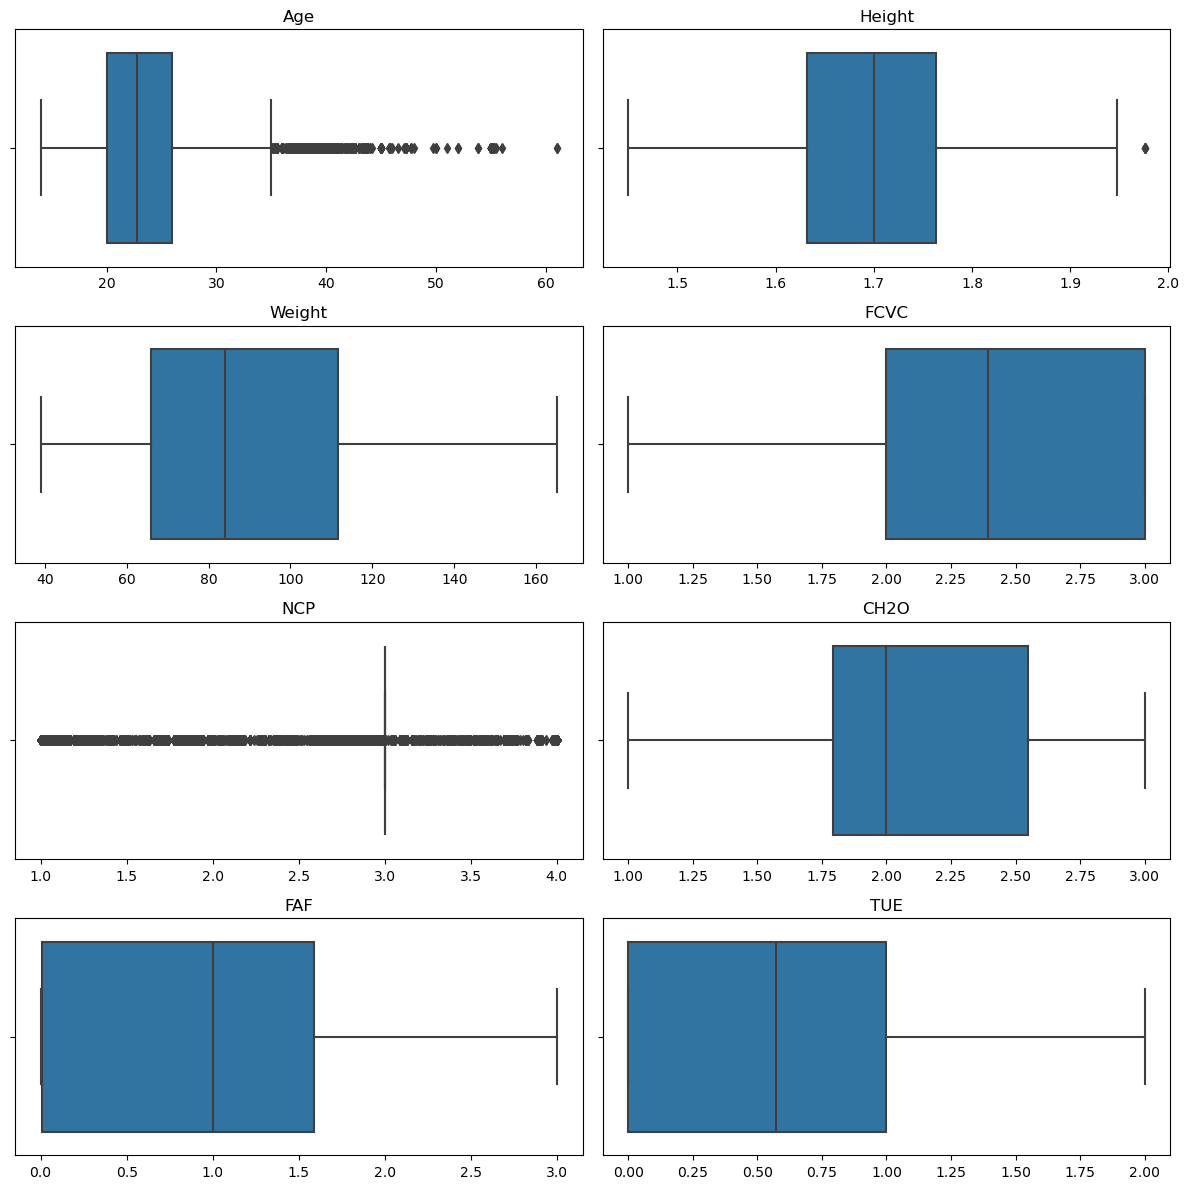

In [61]:
# Sürekli değişkenler için kutu grafikleri çizdirme
num_columns = data_cont.columns  # Sürekli değişkenlerin sütun adlarını alır
n_cols = 2  # İki sütunlu grafikler
n_rows = (len(num_columns) + 1) // n_cols  # Gerekli satır sayısını hesaplar

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 3))  # Yeterli boyutta bir figür oluşturut
axes = axes.flatten()  # Eksenleri tek boyutlu diziye çevir

for i, col in enumerate(num_columns):
    sns.boxplot(x=data_cont[col], ax=axes[i])  # Her sütun için bir kutu grafiği çizer
    axes[i].set_title(col)  # Grafiğe başlık ekler
    axes[i].set_xlabel('')  # X eksenini temizler

# Kullanılmayan eksenleri gizler
for i in range(len(num_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

* Age ve NCP sütununda bir çok aykırı değer olduğunu görüyorum. Ancak sütunlar hakkında açıklamalara tekrar göz atarsanız, bunların yanlışlıkla girelebilecek değer olduğunu düşünmüyorum, bu sebeple olduğu gibi bırakacağım ve herhangi bir işlem yapmayacağım. 

* Model geliştirmeden önce sürekli değişkenleri normalize etmekte fayda vardır.

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max scaler nesnesini oluşturma
scaler = MinMaxScaler()

# Sürekli değişkenleri normalize etme
data_cont_norm = pd.DataFrame(scaler.fit_transform(data_cont), columns=data_cont.columns)

# Normalize edilmiş verileri göster
data_cont_norm.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.222192,0.475586,0.338497,0.500000,0.661099,0.881787,0.000000,0.488237
1,0.085106,0.209260,0.142792,0.500000,0.666667,0.500000,0.333333,0.500000
2,0.085106,0.497391,0.088577,0.440267,0.137228,0.455189,0.288682,0.836792
3,0.147931,0.496002,0.732007,1.000000,0.666667,0.337031,0.489288,0.390099
4,0.375342,0.883049,0.434708,0.839832,0.323824,0.489924,0.655991,0.465861


Kategorik verilerin de hepsinin önemli olduğunu düşünüyorum, bu sebeple geliştireceğim makine öğrenmesi modellerine hepsini ekleyeceğim. Ancak modele eklemeden önce encoding işlemi yapalım. Bu sebep One-Hot Encoding yöntemi kullanacağım. Bunu yapmadan önce Y target değişkenini veri setinden çıkaralım

In [ ]:
Y = data_cat['NObeyesdad']

In [ ]:
data_cat.drop("NObeyesdad", axis=1, inplace=True)

In [103]:
# Y için label encoder oluşturalım
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
Y_encoded_df = pd.DataFrame(Y_encoded, columns=['Encoded_Label'])

In [108]:
# Label encoding ile kullanılan sınıf etiketlerini ve tamsayı değerlerini alır
class_labels = label_encoder.classes_
encoded_values = label_encoder.transform(class_labels)

# Tablo oluştur
label_encoding_table = pd.DataFrame({'Orijinal Kategori': class_labels, 'Label Encoding Tamsayı Değeri': encoded_values})
print(label_encoding_table)

     Orijinal Kategori  Label Encoding Tamsayı Değeri
0  Insufficient_Weight                              0
1        Normal_Weight                              1
2       Obesity_Type_I                              2
3      Obesity_Type_II                              3
4     Obesity_Type_III                              4
5   Overweight_Level_I                              5
6  Overweight_Level_II                              6


In [89]:
data_cat.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [90]:
data_cat_encoded = pd.get_dummies(data_cat, drop_first=False)
data_cat_encoded.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,False,True,False,True,False,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
1,True,False,False,True,False,True,False,True,False,False,...,True,False,False,False,True,True,False,False,False,False
2,True,False,False,True,False,True,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False
3,True,False,False,True,False,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
4,False,True,False,True,False,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False


**Tüm veri setimizi birleştirelim ve sonrasında Train ve Validation diye ayıralım. Validation diye ayırmamızın sebebi, test veri setinin zaten bize verilmiş olmasıdır, karışıklık olmaması adına bu şekilde isimlendirmek daha sağlıklıdır.** 

In [104]:
print(data_id.shape)
print(data_cat_encoded.shape)
print(data_cont_norm.shape)
print(Y_encoded_df.shape)

(20758,)
(20758, 22)
(20758, 8)
(20758, 1)


In [137]:
# Normalize edilmiş sürekli değişkenler, one-hot encoded kategorik değişkenler ve id sütununu birleştirme
combined_data = pd.concat([data_id, data_cont_norm, data_cat_encoded,Y_encoded_df], axis=1)

In [138]:
combined_data.head(5)

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,...,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Encoded_Label
0,0,0.222192,0.475586,0.338497,0.500000,0.661099,0.881787,0.000000,0.488237,False,...,False,False,True,False,False,False,False,True,False,6
1,1,0.085106,0.209260,0.142792,0.500000,0.666667,0.500000,0.333333,0.500000,True,...,False,False,False,True,True,False,False,False,False,1
2,2,0.085106,0.497391,0.088577,0.440267,0.137228,0.455189,0.288682,0.836792,True,...,False,False,False,True,False,False,False,True,False,0
3,3,0.147931,0.496002,0.732007,1.000000,0.666667,0.337031,0.489288,0.390099,True,...,False,False,True,False,False,False,False,True,False,4
4,4,0.375342,0.883049,0.434708,0.839832,0.323824,0.489924,0.655991,0.465861,False,...,False,False,True,False,False,False,False,True,False,6


In [139]:
from sklearn.model_selection import train_test_split
Y = combined_data['Encoded_Label']
X = combined_data.drop(['Encoded_Label'], axis=1) 

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.15, random_state=42)
# Eğitim ve doğrulama setlerinin boyutlarını kontrol edelim
print("Eğitim seti boyutu:", X_train.shape)
print("Doğrulama seti boyutu:", X_validation.shape)
print("Eğitim Y boyutu:", Y_train.shape)
print("Doğrulama Y boyutu:", Y_validation.shape)

Eğitim seti boyutu: (17644, 31)
Doğrulama seti boyutu: (3114, 31)
Eğitim Y boyutu: (17644,)
Doğrulama Y boyutu: (3114,)


Hangi makine öğrenmesi modeli seçeceğimiz önemlidir. Veri setimizde kategorik verilerin sınıf dengesizliği mevcut olduğu için, ağaç tabanlı modeller genelde daha iyi sonuçlar verir.

In [140]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier modelini oluşturma
model = RandomForestClassifier(random_state=42)

# Modeli eğitme
model.fit(X_train, Y_train)

# Modeli doğrulama seti ile değerlendirme
accuracy = model.score(X_validation, Y_validation)
print("Doğruluk:", accuracy)

Doğruluk: 0.8930635838150289


Görüldüğü üzere doğruluk oranı **%89,30** bulunmuştur. Ancak bunu yaparken RFC algoritmasında default parametreler kullanılmıştır. 
Default parametreler;

* n_estimators: 100* 
criterion: 'gini' (veya 'entropy')* 
max_depth: Non* e
min_samples_split:*  2
min_samples_lea: * 0.0
max_features: 'auto' (yani, "sqrt(n_eatu
mbinasyonu b

**Not:** id sütununu algoritmayı oluştururken parametre olarak modele ekledik, yaparken farketmedim bu sebeple siz çalışmanızı yaparken id sütunununu çıkarıp modeli kurabilirsiniz.ulur.

In [141]:
from sklearn.metrics import confusion_matrix

# RandomForestClassifier modeli ile tahmin yapma
predictions = model.predict(X_validation)

# Confusion matrix oluşturma
cm = confusion_matrix(Y_validation, predictions)

# Confusion matrix'i bir DataFrame'e dönüştürme
cm_df = pd.DataFrame(cm, index=model.classes_, columns=best_model.classes_)

# Confusion matrix'i ekrana yazdırma
print("Random Forest Confusion Matrix:")
print(cm_df)

Random Forest Confusion Matrix:
     0    1    2    3    4    5    6
0  360   31    0    0    0    2    1
1   19  416    0    0    0   34    5
2    0    2  346    9    1   15   35
3    0    0    9  480    1    0    3
4    0    0    0    0  603    1    0
5    1   41    7    0    0  267   46
6    0   12   25    1    0   32  309


In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# RandomForestClassifier modeli ile tahmin yapma
predictions = model.predict(X_validation)

# Accuracy
accuracy = accuracy_score(Y_validation, predictions)

# Precision
precision = precision_score(Y_validation, predictions, average='weighted')

# Recall
recall = recall_score(Y_validation, predictions, average='weighted')

# F1 Score
f1 = f1_score(Y_validation, predictions, average='weighted')

# Metrikleri bir DataFrame'e dönüştürme
metrics_df = pd.DataFrame({'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1]})

# Metrikleri yazdıralım
print("Random Forest Model Metrics:")
print(metrics_df)

Random Forest Model Metrics:
   Accuracy  Precision    Recall  F1 Score
0  0.893064   0.894238  0.893064  0.893339
